<a href="https://colab.research.google.com/github/pedrecho/scrap_news/blob/main/cybersport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

In [ ]:
url = 'https://www.cybersport.ru/'
page = requests.get(url)
page.status_code

200

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(page.text, "html.parser")

In [ ]:
articles = soup.findAll('li', class_='news-sidebar__item')

In [ ]:
data = []
data.append(list(map(lambda x: x.find('a').text, articles)))
data.append(list(map(lambda x: x.find('a')['href'], articles)))
data.append(list(map(lambda x: x.find('g')['class'][0], articles)))
data.append(list(map(lambda x: x.find('p').text, articles)))

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'Title': data[0],
    'Link': data[1],
    'Category': data[2],
    'Time': data[3]
})
df.head()

,Title,Link,Category,Time
0,Alliance против Team Tickles — сможет ли коман...,/dota-2/news/alliance-protiv-team-tickles-smoz...,icon-game--dota2,14:27
1,"Electronic: «NiKo показывает нереальную форму,...",/counter-strike-go/news/electronic-niko-pokazy...,icon-game--cs-go,14:14
2,DPC. TNC Predator против Execration [LIVE],/base/match/group/dota-pro-circuit-2021-2022-i...,icon-game--dota2,14:00
3,"Sh4dowehhh назвал состав, который хотел бы тре...",/dota-2/news/sh4doweh-nazval-sostav-kotoryi-kh...,icon-game--dota2,13:49
4,"Boombl4 о победе над G2: «S1mple показал, что ...",/counter-strike-go/news/boombl4-o-pobede-nad-g...,icon-game--cs-go,13:32


In [ ]:
df['Category'] = list(map(lambda x: x.replace('icon-game--', ''), df['Category']))
df.sample(5)

,Title,Link,Category,Time
2,DPC. TNC Predator против Execration [LIVE],/base/match/group/dota-pro-circuit-2021-2022-i...,dota2,14:00
11,"Stewie2k: «Не сомневаюсь, что мы обыграем NAVI...",/counter-strike-go/news/stewie2k-ne-somnevayus...,cs-go,11:16
48,Фанаты обвинили авторов S.T.A.L.K.E.R. 2 в под...,/games/news/fanaty-obvinili-avtorov-s-t-a-l-k-...,games,16:57
46,«NAVI не попадут на мейджор» — Yatoro оценил к...,/dota-2/news/navi-ne-popadut-na-meidzhor-yator...,dota2,17:02
43,B1ad3: «Я не вижу m0NESY в роли основного снай...,/counter-strike-go/news/b1ad3-ya-ne-vizhu-m0ne...,cs-go,18:17


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
pie = df['Category'].value_counts()
print(pie)

dota2        34
cs-go        15
games         5
others        4
free-fire     1
pubg          1
Name: Category, dtype: int64


([<matplotlib.patches.Wedge at 0x7fbc94ea0f10>,
 [Text(-0.22870284646768627, 1.0759623636622138, 'dota2'),
  Text(-0.3942047701395421, -1.0269384593047584, 'cs-go'),
  Text(0.6922524154812202, -0.8548605694851157, 'games'),
  Text(1.0049000041050207, -0.447410305815288, 'others'),
  Text(1.0864571772727045, -0.17207789501451665, 'free-fire'),
  Text(1.0984924894203338, -0.057569529154908095, 'pubg')])

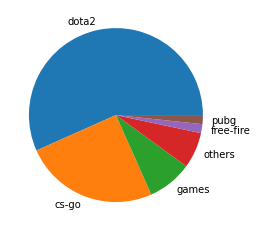

In [ ]:
plt.pie(pie.values, labels=pie.index.values)

In [ ]:
df.to_csv("data.csv", index=False)

# Новый раздел